In [ ]:
# pre-processing(de-noising)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

In [ ]:
img=cv2.imread("bt9.jpeg")

In [ ]:
from google.colab.patches import cv2_imshow

Median Filtering

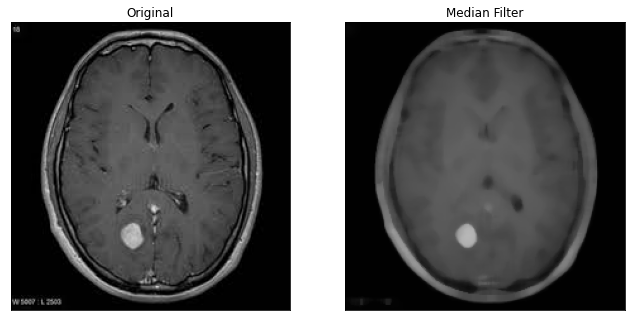

In [ ]:
figure_size = 9
img1 = cv2.medianBlur(img, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img1, cmap='gray'),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

In this case, we do not require the usage of filtering. So, we are only considering the original image that is un filtered.

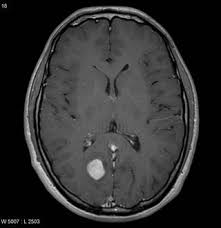

In [ ]:
cv2_imshow(img)

Skull Removal

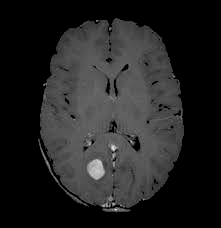

In [ ]:
gray          = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#Threshold the image to binary using Otsu's method
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
ret, markers = cv2.connectedComponents(thresh)

#Get the area taken by each component. Ignore label 0 since this is the background.
marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0]
#Get label of largest component by area
largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above
#Get pixels which correspond to the brain
brain_mask = markers==largest_component

img2 = img.copy()
#In a copy of the original image, clear those pixels that don't correspond to the brain
img2[brain_mask==False] = (0,0,0)
cv2_imshow(img2)


K-means

In [ ]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = img2.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

In [ ]:
print(pixel_values.shape)

(50388, 3)


In [ ]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [ ]:
# number of clusters (K)
k = 5
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [ ]:
# convert back to 8 bit values
centers = np.uint8(centers)
# flatten the labels array
labels = labels.flatten()

In [ ]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

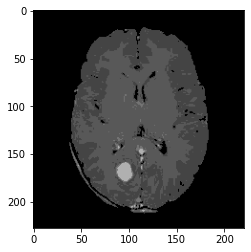

In [ ]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(img2.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

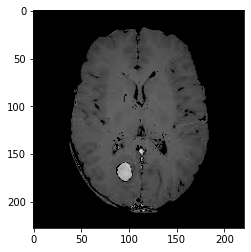

In [ ]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(img2)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(img2.shape)
# show the image
plt.imshow(masked_image)
plt.show()

Thresholding

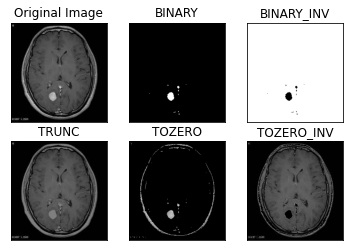

In [ ]:
ret,thresh1 = cv2.threshold(masked_image,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(masked_image,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

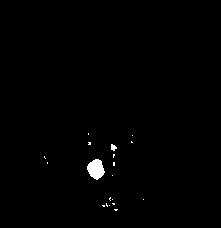

In [ ]:
cv2_imshow(thresh1)

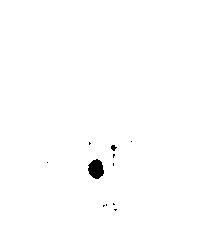

In [ ]:
cv2_imshow(thresh2)

Morphological operations(erosion)

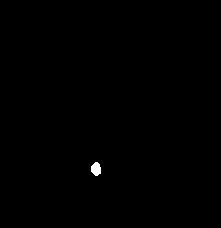

In [ ]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(thresh1,kernel,iterations = 1)
cv2_imshow(erosion)

Dilation

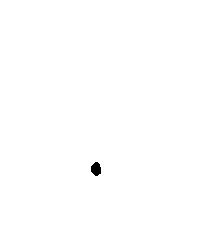

In [ ]:
dilation = cv2.dilate(thresh2,kernel,iterations = 1)
cv2_imshow(dilation)